In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import io

In [38]:
class LookieroColors:
    PINK = "#EEC7C0"
    PEACH = "#F4D5CC"
    BLUSH = "#F7E9E5"
    TEAL = "#6BA6A9"
    MINT = "#9ECBCF"
    GREY = "#4A4A4A"
    
    @classmethod
    def palette_distinct(cls):
        return [cls.TEAL, cls.PINK, cls.GREY, cls.MINT, cls.PEACH]

In [39]:
# Carga de datos
df = pd.read_csv("season9_limpios.csv")

In [40]:
# Mapeo de Niveles
mapping_niveles = {
    1: 'Nivel 1 (Pantalones, Vestidos)',
    2: 'Nivel 2 (Camisetas, Tops, Jerséis)',
    3: 'Nivel 3 (Abrigos, Chaquetas, Complementos)'
}
df['Nivel_Descriptivo'] = df['Nivel'].map(mapping_niveles)

In [41]:
# Cálculo de productos únicos
productos_unicos = df['Id_producto'].nunique()

print(f"--- RESUMEN POST-PROCESAMIENTO: TEMPORADA 9 ---")
print(f"Total de registros analizados: {len(df)}")
print(f"Cantidad de productos únicos: {productos_unicos}")
#Esto demuestra que hay esa cantidad de productos únicos, y al ver que hay más registros que productos únicos, se ha querido ver el porqué de esto, y 
#se ha observado que es porque el color cambia aunque sea el mismo producto, poner ejemplo ilustrativo

--- RESUMEN POST-PROCESAMIENTO: TEMPORADA 9 ---
Total de registros analizados: 1708
Cantidad de productos únicos: 969


In [42]:
# TABLA 1: Resumen de Prendas por Nivel y Origen
# Esta tabla muestra cómo se abastece Lookiero en cada categoría
tabla_origen_nivel = pd.crosstab(df['Nivel_Descriptivo'], df['origin'])
print("\n--- TABLA 1: DISTRIBUCIÓN POR NIVEL Y ORIGEN ---")
print(tabla_origen_nivel)


--- TABLA 1: DISTRIBUCIÓN POR NIVEL Y ORIGEN ---
origin                                      MAINSTREAM  NO_MAINSTREAM  \
Nivel_Descriptivo                                                       
Nivel 1 (Pantalones, Vestidos)                     275            120   
Nivel 2 (Camisetas, Tops, Jerséis)                 347            198   
Nivel 3 (Abrigos, Chaquetas, Complementos)         119             27   

origin                                      OWN_PRODUCTION  PREMIUM  \
Nivel_Descriptivo                                                     
Nivel 1 (Pantalones, Vestidos)                          21       17   
Nivel 2 (Camisetas, Tops, Jerséis)                      83       15   
Nivel 3 (Abrigos, Chaquetas, Complementos)             116        2   

origin                                      WHOLE_SALE  
Nivel_Descriptivo                                       
Nivel 1 (Pantalones, Vestidos)                     167  
Nivel 2 (Camisetas, Tops, Jerséis)                 152  


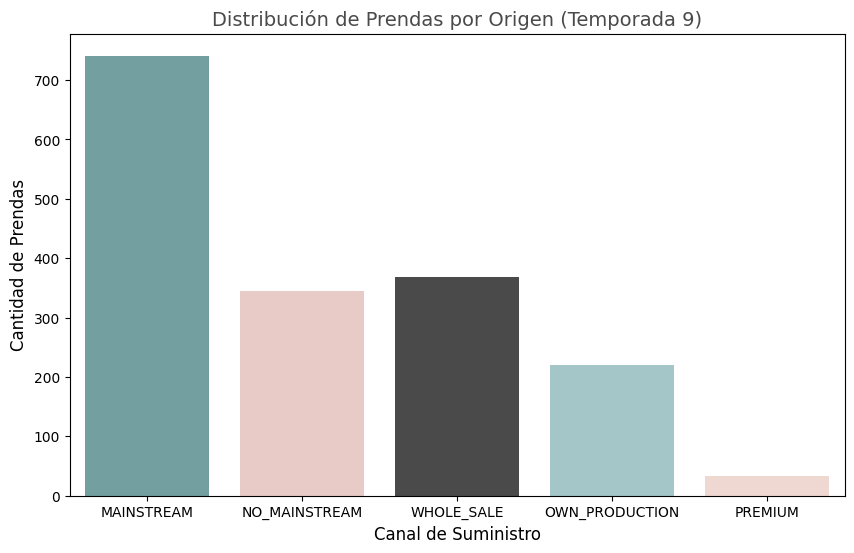

In [43]:
# --- GRÁFICO 1: ORIGEN
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='origin', palette=LookieroColors.palette_distinct(), hue='origin', legend=False)
plt.title('Distribución de Prendas por Origen (Temporada 9)', fontsize=14, color=LookieroColors.GREY)
plt.xlabel('Canal de Suministro', fontsize=12)
plt.ylabel('Cantidad de Prendas', fontsize=12)
plt.show()

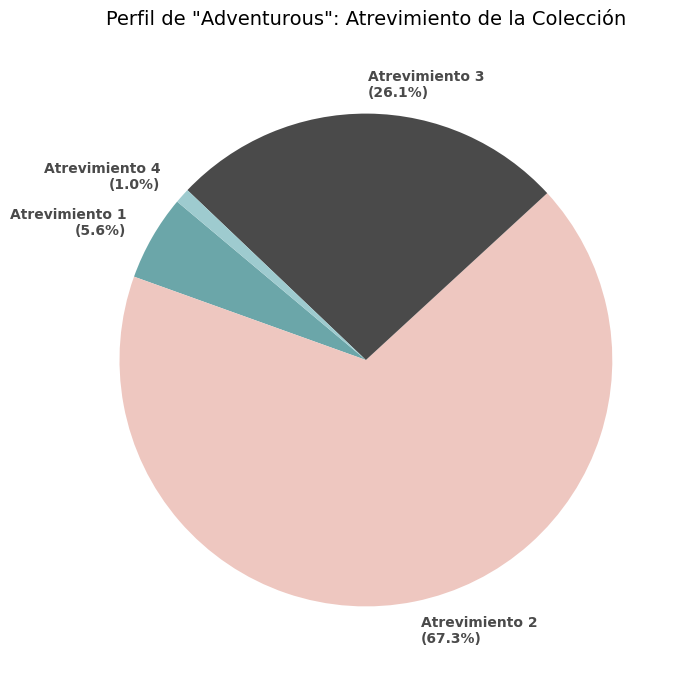

In [44]:
# --- GRÁFICO 2: PERFIL ADVENTUROUS
plt.figure(figsize=(8, 8))
adv_counts = df['adventurous'].value_counts().sort_index()

labels_con_porcentaje = [
    f'Atrevimiento {i}\n({(v/adv_counts.sum()*100):.1f}%)' 
    for i, v in adv_counts.items()
]

plt.pie(
    adv_counts, 
    labels=labels_con_porcentaje, 
    startangle=140, 
    colors=LookieroColors.palette_distinct(),
    textprops={'color': LookieroColors.GREY, 'weight': 'bold', 'fontsize': 10},
    labeldistance=1.12
)

plt.title('Perfil de "Adventurous": Atrevimiento de la Colección', fontsize=14, pad=20)
plt.show()

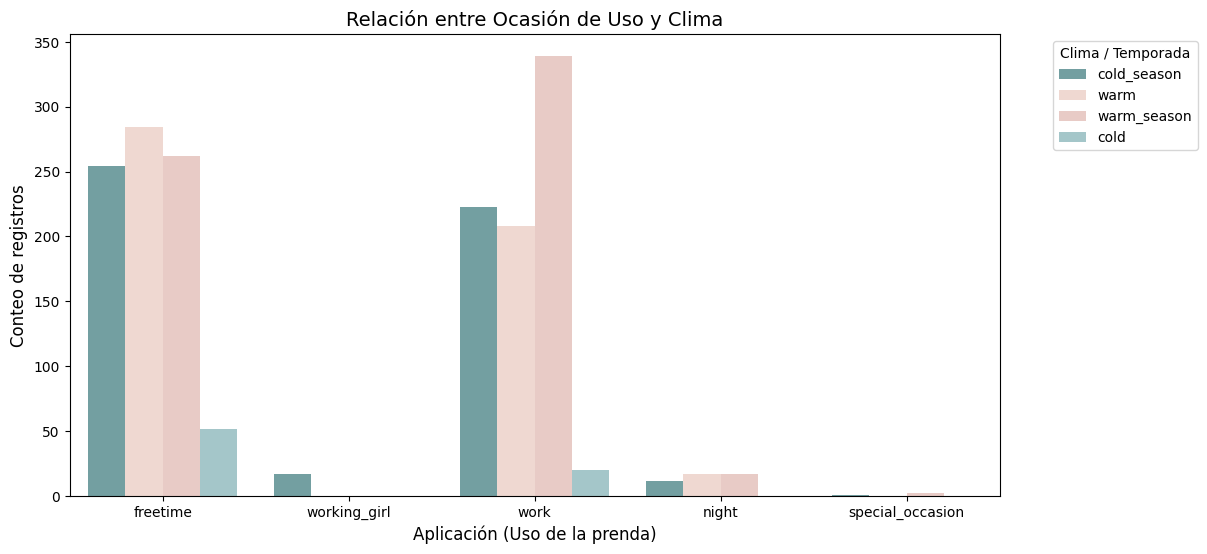

In [45]:
# --- GRÁFICO 3: OCASIÓN DE USO Y CLIMA
weather_colors = {
    'cold_season': LookieroColors.TEAL, 
    'cold': LookieroColors.MINT,
    'warm_season': LookieroColors.PINK,
    'warm': LookieroColors.PEACH
}

plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='application', hue='weather', palette=weather_colors)
plt.title('Relación entre Ocasión de Uso y Clima', fontsize=14)
plt.xlabel('Aplicación (Uso de la prenda)', fontsize=12)
plt.ylabel('Conteo de registros', fontsize=12)
plt.legend(title='Clima / Temporada', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_20252\3490952091.py:3: UserWarning: The palette list has more values (5) than needed (4), which may not be intended.
  sns.countplot(data=df, x='fit', palette=LookieroColors.palette_distinct(), hue='fit', legend=False)


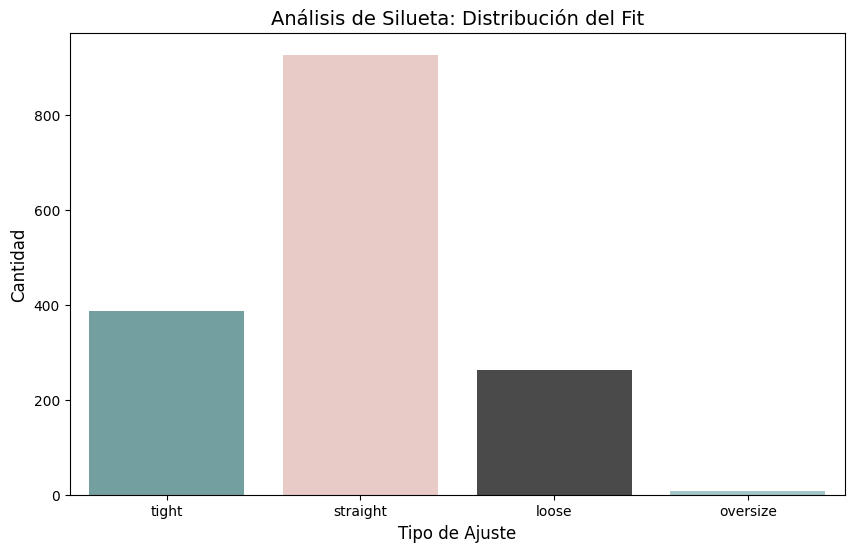

In [46]:
# --- GRÁFICO 4: ANÁLISIS DE SILUETA
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='fit', palette=LookieroColors.palette_distinct(), hue='fit', legend=False)
plt.title('Análisis de Silueta: Distribución del Fit', fontsize=14)
plt.xlabel('Tipo de Ajuste', fontsize=12)
plt.ylabel('Cantidad', fontsize=12)
plt.show()